## Geoinformatics libs

In [2]:
# from osgeo import gdal, osr, ogr

# def get_value_at_point(rasterfile, pos):
#     gdal.UseExceptions()
#     gdata = gdal.Open(rasterfile)
#     gt = gdata.GetGeoTransform()
#     x = int((pos[0] - gt[0])/gt[1])
#     y = int((pos[1] - gt[3])/gt[5])

#     data = gdata.ReadAsArray(x,y).astype(np.float) #This will only load the cell you want
#     return data
# get_value_at_point(path, (10,10))

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from osgeo import gdal
gdal.UseExceptions()

In [5]:
path = 'E:/scan_tiff/07417/VE0D6A80006005/VE0D6A80006005_Default_Extended.tif'
path_small='E:/scan_tiff/07417/VE0D6A80006005/VE0D6A80006005_Preview_Image.tif'

In [6]:
ds = gdal.Open(path)
# channel = np.array(ds.GetRasterBand(1).ReadAsArray()) # TOO BIG!
data = ds.ReadAsArray(1435,3337,1000,1000)#.astype(np.float)
BIG_ROWS = ds.RasterXSize
BIG_COLUMNS = ds.RasterYSize
print(f"x:{ds.RasterXSize} y:{ds.RasterYSize} layers:{ds.RasterCount}")

x:84480 y:195072 layers:3


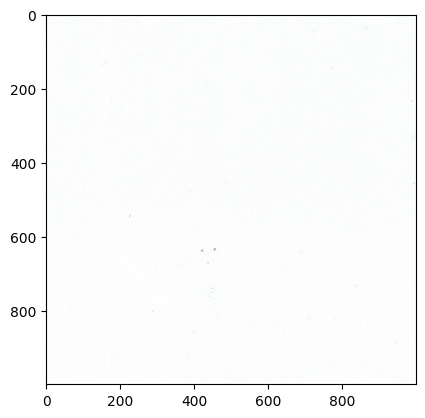

In [7]:
plt.imshow(np.moveaxis(data, [0, 1, 2], [-1, -2, -3]))

In [8]:
ds_small = gdal.Open(path_small)

In [9]:
ds_band = ds_small.GetRasterBand(1) # TOO BIG!
ds_array = ds_band.ReadAsArray()
# plt.imshow(ds_array)
# plt.axis('off')

In [10]:
rows_small, col_samll = ds_array.shape

In [11]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20,30))

# img=mpimg.imread('ausgabe.png')
to_cut  = []

def onclick(event):
    global to_cut
    col, row = event.xdata, event.ydata
    to_cut.append([col/col_samll, row/rows_small])
    print(row, col, col/col_samll, row/rows_small)
    


cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(ds_array)
plt.show()

In [13]:
to_cut

[[0.2595364174097359, 0.2747823433235298],
 [0.2891620057101951, 0.28497823183148885]]

In [17]:
ds = gdal.Open(path)
# channel = np.array(ds.GetRasterBand(1).ReadAsArray()) # TOO BIG!
BIG_ROWS = ds.RasterXSize
BIG_COLUMNS = ds.RasterYSize
data = ds.ReadAsArray(to_cut[0][0]*BIG_ROWS,
                      to_cut[0][1]*BIG_COLUMNS,
                      int((to_cut[1][0]-to_cut[0][0])*BIG_ROWS),
                      int((to_cut[1][1]-to_cut[0][1])*BIG_COLUMNS))#.astype(np.float)
print(data.shape)

(3, 1988, 2502)


In [18]:
plt.imshow(np.moveaxis(data, [0, 1, 2], [-1, -2, -3]))

# LARGE IMAGE / OPENSLIDE

In [5]:
import cv2
import numpy as np

In [2]:
import openslide as osclean

In [5]:
test = osclean.open_slide("E:/skannid/07417/VE0D6A80006005.mrxs")
test2 = osclean.open_slide("E:/skannid/07417/VE0D6A80006006.mrxs")

In [108]:
print(test.level_count)
print(test.dimensions)
print(test.level_dimensions)

10
(88320, 208640)
((88320, 208640), (44160, 104320), (22080, 52160), (11040, 26080), (5520, 13040), (2760, 6520), (1380, 3260), (690, 1630), (345, 815), (172, 407))


In [109]:
print(test.level_dimensions)
print(test2.level_dimensions)

((88320, 208640), (44160, 104320), (22080, 52160), (11040, 26080), (5520, 13040), (2760, 6520), (1380, 3260), (690, 1630), (345, 815), (172, 407))
((88320, 208640), (44160, 104320), (22080, 52160), (11040, 26080), (5520, 13040), (2760, 6520), (1380, 3260), (690, 1630), (345, 815), (172, 407))


In [110]:
xs = []
ys = []
for el in test.level_dimensions:
    print(el[1]/el[0])
    xs.append(el[0])
    ys.append(el[1])

2.36231884057971
2.36231884057971
2.36231884057971
2.36231884057971
2.36231884057971
2.36231884057971
2.36231884057971
2.36231884057971
2.36231884057971
2.366279069767442


In [111]:
shadow = ys[0]
for el in ys:
    print(el/shadow)
    shadow = el

1.0
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.49938650306748467


In [112]:
print(osclean.open_slide("E:/skannid/07417/VE0D6A80006004.mrxs").level_dimensions)

((88320, 208640), (44160, 104320), (22080, 52160), (11040, 26080), (5520, 13040), (2760, 6520), (1380, 3260), (690, 1630), (345, 815), (172, 407))


In [113]:
print(osclean.open_slide("E:/skannid/06757/VE0D6A80005ee9.mrxs").level_dimensions)

((88320, 208640), (44160, 104320), (22080, 52160), (11040, 26080), (5520, 13040), (2760, 6520), (1380, 3260), (690, 1630), (345, 815), (172, 407))


In [80]:
lowlevel = test2.read_region((0,0), 7, test2.level_dimensions[7])
lowlevel = np.array(lowlevel)
cv2.imshow('Base', lowlevel)
cv2.waitKey(0)

-1

In [194]:
edges = cv2.Canny(lowlevel, threshold1=32, threshold2=48)
edges = cv2.dilate(edges, np.full((3,3),1))
contours,hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
out = lowlevel.copy()
for cnt in contours:
    if cv2.contourArea(cnt) < 2000:
        cv2.drawContours(out, [cnt], 0, (0,0,255),3)
    else:
        print(cv2.boundingRect(cnt))
        cv2.drawContours(out, [cnt], 0, (0,255,0), 3)
# out = cv2.erode(out, np.full((5,5),1))
# out = cv2.dilate(out, np.full((7,7),1))
cv2.imshow('Contours', out[:,:,:])
cv2.waitKey(0)

(174, 1387, 147, 143)
(338, 1364, 152, 146)
(218, 1229, 114, 90)
(362, 1180, 142, 136)
(254, 766, 259, 259)
(180, 220, 170, 443)


-1

In [107]:
bounds = (174, 1387, 147, 143)
cv2.imshow('eh', lowlevel[bounds[1]:bounds[1]+bounds[3],bounds[0]:bounds[0]+bounds[2],:])
cv2.waitKey(0)

-1

# Testing wrapper

In [1]:
import cv2
import numpy as np

import importlib
import handling
importlib.reload(handling)

<module 'handling' from '/mnt/d/uni/THESIS/app/handling.py'>

In [2]:
testwrap = handling.mrxs_wrapper("E:/skannid/07417/VE0D6A80006005.mrxs")

FileNotFoundError: [Errno 2] No such file or directory: 'E:/skannid/07417/VE0D6A80006005.mrxs'

In [338]:
testwrap.region_tree

{0: {'children': None,
  'abs_bounds': {'x': 29696, 'y': 186496, 'w': 17664, 'h': 17920},
  'abs_contour': array([[[ 36992, 186496]],
  
         [[ 36864, 186624]],
  
         [[ 36736, 186624]],
  
         ...,
  
         [[ 37376, 186496]],
  
         [[ 37248, 186496]],
  
         [[ 37120, 186496]]])},
 1: {'children': None,
  'abs_bounds': {'x': 49792, 'y': 180864, 'w': 18048, 'h': 18048},
  'abs_contour': array([[[ 58368, 180864]],
  
         [[ 58240, 180992]],
  
         [[ 58112, 180992]],
  
         ...,
  
         [[ 58752, 180864]],
  
         [[ 58624, 180864]],
  
         [[ 58496, 180864]]])},
 2: {'children': None,
  'abs_bounds': {'x': 30592, 'y': 166656, 'w': 15488, 'h': 10880},
  'abs_contour': array([[[ 43008, 166656]],
  
         [[ 42880, 166784]],
  
         [[ 42880, 166912]],
  
         ...,
  
         [[ 43392, 166656]],
  
         [[ 43264, 166656]],
  
         [[ 43136, 166656]]])},
 3: {'children': None,
  'abs_bounds': {'x': 49152, 'y': 1

In [339]:
# contour localization test
bbs = testwrap._bounds_at_lvl([2], 6, origin_rescale=True)
ori_x = bbs['x']
ori_y = bbs['y']

cnt = testwrap.cnt_at_lvl([2], 6)
select_x = [[1,0]]
mask_x = np.stack([select_x*cnt.shape[0]], axis=1)
select_y = [[0,1]]
mask_y = np.stack([select_y*cnt.shape[0]], axis=1)

cnt_adjust = np.where(mask_x, cnt-ori_x, cnt)
cnt_adjust = np.where(mask_y, cnt_adjust-ori_y, cnt_adjust)

In [340]:
cnt_adjust

array([[[194,   0]],

       [[192,   2]],

       [[192,   4]],

       ...,

       [[200,   0]],

       [[198,   0]],

       [[196,   0]]])

In [343]:
# global purge test
lowlevel = testwrap.obj_at_lvl([2],5,purge=True)
# cnt = testwrap.cnt_at_lvl([2], 6, local=True)
# for i in range(lowlevel.shape[0]):
#     for j in range(lowlevel.shape[1]):
#         dist = cv2.pointPolygonTest(cnt,(j,i),False)
#         if dist < 0:
#             lowlevel[i,j,:] = [0,0,0,0]

# cv2.drawContours(lowlevel, [cnt], 0, (0,255,0), 3)
cv2.imshow('test', lowlevel[:,:,:])
cv2.waitKey(0)

-1

In [314]:
cnt

array([[[ 672, 2604]],

       [[ 670, 2606]],

       [[ 670, 2608]],

       ...,

       [[ 678, 2604]],

       [[ 676, 2604]],

       [[ 674, 2604]]])

# Region correlation

In [2]:
import cv2
import numpy as np

import importlib
import handling
importlib.reload(handling)

<module 'handling' from 'D:\\uni\\THESIS\\app\\handling.py'>

In [3]:
wrap_ecad = handling.mrxs_wrapper("E:/skannid/07417/VE0D6A80006005.mrxs")
wrap_p63 = handling.mrxs_wrapper("E:/skannid/07417/VE0D6A80006006.mrxs")

In [9]:
out = wrap_p63.obj_at_lvl([2],4,purge=True)
cv2.imshow('purged', out)
cv2.waitKey(0)

-1

In [9]:
wrap_p63.region_tree
# observe le hole du corruption at pos 4 *if there's no fix

{0: {'children': None,
  'abs_bounds': {'x': 22272, 'y': 177536, 'w': 18816, 'h': 18304},
  'abs_contour': array([[[ 30336, 177536]],
  
         [[ 30208, 177664]],
  
         [[ 30080, 177664]],
  
         ...,
  
         [[ 30720, 177536]],
  
         [[ 30592, 177536]],
  
         [[ 30464, 177536]]])},
 1: {'children': None,
  'abs_bounds': {'x': 43264, 'y': 174592, 'w': 19456, 'h': 18688},
  'abs_contour': array([[[ 47232, 174592]],
  
         [[ 47104, 174720]],
  
         [[ 47104, 174848]],
  
         ...,
  
         [[ 47616, 174592]],
  
         [[ 47488, 174592]],
  
         [[ 47360, 174592]]])},
 2: {'children': None,
  'abs_bounds': {'x': 27904, 'y': 157312, 'w': 14592, 'h': 11520},
  'abs_contour': array([[[ 29696, 157312]],
  
         [[ 29568, 157440]],
  
         [[ 29440, 157440]],
  
         [[ 29312, 157568]],
  
         [[ 29184, 157568]],
  
         [[ 29056, 157568]],
  
         [[ 28928, 157568]],
  
         [[ 28800, 157568]],
  
         [[

In [10]:
sorting = dict()
moments_1 = dict()
moments_2 = dict()
for opt1 in wrap_p63.region_tree:
    cnt1 = wrap_p63.region_tree[opt1]['abs_contour']
    sorting[opt1] = dict()
    moments_1[opt1] = cv2.moments(cnt1)
    for opt2 in wrap_ecad.region_tree:
        cnt2 = wrap_ecad.region_tree[opt2]['abs_contour']
        
        dist = cv2.matchShapes(cnt1, cnt2, cv2.CONTOURS_MATCH_I1, None)
        sorting[opt1][opt2] = dist
        print(f"for {opt1}, {opt2} contour distance is {dist}")
        
        moments_2[opt2] = cv2.moments(cnt2)

for 0, 0 contour distance is 0.1009377966677254
for 0, 1 contour distance is 0.08137323282933262
for 0, 2 contour distance is 0.29885619015547815
for 0, 3 contour distance is 0.11035261437380003
for 0, 4 contour distance is 33.60378661173132
for 1, 0 contour distance is 0.10754126457264535
for 1, 1 contour distance is 0.020471578974885718
for 1, 2 contour distance is 0.33075757737311834
for 1, 3 contour distance is 0.06138167892157789
for 1, 4 contour distance is 33.442971982937905
for 2, 0 contour distance is 0.18691097083364558
for 2, 1 contour distance is 0.25787700591299256
for 2, 2 contour distance is 0.11219226384582964
for 2, 3 contour distance is 0.27994699244886656
for 2, 4 contour distance is 33.24324678282144
for 3, 0 contour distance is 0.13387210433101623
for 3, 1 contour distance is 0.04261043769703421
for 3, 2 contour distance is 0.38561182136558125
for 3, 3 contour distance is 0.007290822539250119
for 3, 4 contour distance is 33.246999794580105
for 4, 0 contour distance

In [11]:
excl1 = []
excl2 = []

pairs = []
while True:
    options = dict()
    for i in sorting:
        if i in excl1:
            continue
        for j in sorting[i]:
            if j in excl2:
                continue
            options[sorting[i][j]] = (i,j)
    if not options:
        print("pool exhausted")
        break
    i, j = options[min(options)]
    excl1.append(i)
    excl2.append(j)
    pairs.append((i,j))
    print(f"suggested match: p63-{i} to ecad-{j}")

suggested match: p63-3 to ecad-3
suggested match: p63-1 to ecad-1
suggested match: p63-0 to ecad-0
suggested match: p63-2 to ecad-2
suggested match: p63-4 to ecad-4
pool exhausted


In [34]:
out = wrap_p63.obj_at_lvl([0],6, purge=True)
out2 = wrap_ecad.obj_at_lvl([0],6, purge=True)
cv2.imshow('test', cv2.cvtColor(out, cv2.COLOR_RGBA2BGR))
cv2.imshow('test2', cv2.cvtColor(out2, cv2.COLOR_RGBA2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
for key in moments_1[0]:
    print(key, moments_1[0][key], moments_2[0][key], abs(moments_1[0][key]-moments_2[0][key]))

m00 213409792.0 216170496.0 2760704.0
m10 6806518977877.333 8330506054314.666 1523987076437.333
m01 39645151756288.0 42083366382250.664 2438214625962.664
m20 2.211981653054587e+17 3.2512950243548634e+17 1.0393133713002765e+17
m11 1.2642436667471299e+18 1.6212497082648712e+18 3.570060415177413e+17
m02 7.368664933195579e+18 8.196486814403045e+18 8.27821881207466e+17
m30 7.315953832409937e+21 1.2846316039792855e+22 5.530362207382918e+21
m21 4.108026029294463e+22 6.325696906152478e+22 2.2176708768580153e+22
m12 2.3494098797107743e+23 3.156666448195216e+23 8.07256568484442e+22
m03 1.3702832265070103e+24 1.5971590855137544e+24 2.2687585900674414e+23
mu20 4110185592680096.0 4098962167061824.0 11223425618272.0
mu11 -203832503518976.0 -506011966632704.0 302179463113728.0
mu02 3782361269800960.0 3834445863606272.0 52084593805312.0
mu30 -1.150073026614657e+18 9.638841806288323e+17 2.1139572072434893e+18
mu21 1.2640108041661317e+18 8.191511861757215e+17 4.4485961799041024e+17
mu12 -4.1419450442006

In [29]:
def moment_angle(moments):
    mu00 = moments['m00']
    dmu11 = moments['mu11']/mu00
    dmu20 = moments['mu20']/mu00
    dmu02 = moments['mu02']/mu00
    rad = 0.5*np.arctan( 2*dmu11 / (dmu20 - dmu02) )
    return rad

In [28]:
def flash_cnt(wrap, loc, lvl, base=None):
    cnt = wrap.cnt_at_lvl(loc,lvl,local=True)
    bounds = wrap._bounds_at_lvl(loc,lvl)
    w,h = bounds['w'],bounds['h']
    flash = base
    if not base:
        flash = np.zeros((h,w,3))
    flash = cv2.drawContours(flash, [cnt], 0, (255,255,255), 2).astype(np.uint8)
    return flash

fl1 = flash_cnt(wrap_ecad, [4], 6)
fl2 = flash_cnt(wrap_p63, [4], 6)
cv2.imshow('cnt1', fl1)
cv2.imshow('cnt2', fl2)
cv2.waitKey(0)

-1

In [50]:
edge_moment_1_4 = cv2.moments(cv2.Canny(wrap_ecad.obj_at_lvl([4],7,purge=True), threshold1=32, threshold2=48))
edge_moment_2_4 = cv2.moments(cv2.Canny(wrap_p63.obj_at_lvl([4],7,purge=True), threshold1=32, threshold2=48))

In [53]:
moment_angle(edge_moment_2_4)

-0.28640077519545387

# Edge-based ORB (sort of works?)

In [75]:
el = 2
lvl = 5

obj1 = wrap_p63.obj_at_lvl([el],lvl,purge=False)
obj2 = wrap_ecad.obj_at_lvl([el],lvl,purge=False)

edges1 = cv2.Canny(obj1, threshold1=32, threshold2=48)
edges2 = cv2.Canny(obj2, threshold1=32, threshold2=48)

In [91]:
cv2.imshow('edges', edges2)
cv2.waitKey(0)

-1

In [103]:
feature_detector = cv2.ORB_create(nfeatures = 600)

kp1, desc1 = feature_detector.detectAndCompute(edges1, None)
kp2, desc2 = feature_detector.detectAndCompute(edges2, None)

print(kp1[0].pt)
kp1[0].pt = np.array(kp1[0].pt) - 180
print(kp1[0].pt)
kp1[0].pt = np.array(kp1[0].pt) + 180

GOOD_MATCH_PERCENT = 0.2
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_L1)
matches = list(matcher.match(desc1, desc2, None))
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
num_good = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:num_good]

imMatches = cv2.drawMatches(obj1, kp1, obj2, kp2, matches, None)
cv2.imwrite(f"edge_match_test.jpg", imMatches)

(366.0, 307.0)
(186.0, 127.0)


True

# Gridded regionaliser?

In [117]:
el = 4
lvl = 5

obj1 = wrap_p63.obj_at_lvl([el],lvl,purge=False)
obj2 = wrap_ecad.obj_at_lvl([el],lvl,purge=False)

edges1 = cv2.Canny(obj1, threshold1=32, threshold2=48)
edges2 = cv2.Canny(obj2, threshold1=32, threshold2=48)
gray1 = cv2.cvtColor(obj1, cv2.COLOR_RGBA2GRAY)
gray2 = cv2.cvtColor(obj2, cv2.COLOR_RGBA2GRAY)
cnt1 = cv2.cvtColor(flash_cnt(wrap_p63, [el], lvl), cv2.COLOR_RGB2GRAY)
cnt2 = cv2.cvtColor(flash_cnt(wrap_ecad, [el], lvl), cv2.COLOR_RGB2GRAY)

In [118]:
global_detector = cv2.ORB_create(nfeatures = 1024)
kp1, desc1 = global_detector.detectAndCompute(edges1, None)

In [119]:
from math import ceil

def grid_compute(image, cellsize, nfeat):
    h,w = image.shape[0], image.shape[1]
    wlen = ceil(w/cellsize)
    hlen = ceil(h/cellsize)
    store = [[None for j in range(wlen)] for i in range(hlen)]
    local_detector = cv2.ORB_create(nfeatures = nfeat)
    for i in range(hlen):
        for j in range(wlen):
            region = image[i*cellsize:(i+1)*cellsize,j*cellsize:(j+1)*cellsize]
            store[i][j] = local_detector.detectAndCompute(region, None)
    return store

In [120]:
cellsize = 256
compute_store = grid_compute(edges2, cellsize, 16)

In [121]:
def grid_match_to(comp_store, target_desc, matcher_lambda):
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_L1)
    wlen, hlen = len(comp_store[0]), len(comp_store)
    store = [[None for j in range(wlen)] for i in range(hlen)]
    for i in range(hlen):
        for j in range(wlen):
            _, desc_cur = comp_store[i][j]
            try:
                matches = list(matcher.match(target_desc, desc_cur, None))
            except: continue
            good_matches = matcher_lambda(matches)
            store[i][j] = good_matches
    return store

In [132]:
GOOD_MATCH_PERCENT = 0.05
MAX_MATCH_DIST = 1200

def select_percent(array):
    array.sort(key=lambda x: x.distance, reverse=False)
    num_good = int(len(array) * GOOD_MATCH_PERCENT)
    return array[:num_good]

def select_val(array):
    return [el for el in array if el.distance<MAX_MATCH_DIST]

match_store = grid_match_to(compute_store, desc1, select_val)

In [133]:
t1, t2 = 6, 1

imMatches = cv2.drawMatches(obj1, kp1, obj2[t1*cellsize:(t1+1)*cellsize,t2*cellsize:(t2+1)*cellsize],
                            compute_store[t1][t2][0], match_store[t1][t2], None)
cv2.imwrite(f"edge_match_test.jpg", imMatches)

True

# ECC / Affine warp (MOSTLY WORKS)

In [35]:
el = 2
lvl = 4

invert1 = False
invert2 = False

src1 = wrap_ecad.obj_at_lvl([el], lvl)
if invert1:
    src1 = src1[-1::-1,-1::-1,:]
    
src2 =  wrap_p63.obj_at_lvl([el], lvl)
if invert2:
    src2 = src2[-1::-1,-1::-1,:]
    
grayscale1 = cv2.cvtColor(src1, cv2.COLOR_RGBA2GRAY)
grayscale2 = cv2.cvtColor(src2, cv2.COLOR_RGBA2GRAY)
edges1 = cv2.Canny(src1, threshold1=32, threshold2=48)
edges2 = cv2.Canny(src2, threshold1=32, threshold2=48)
cnt1 = cv2.cvtColor(flash_cnt(wrap_p63, [el], lvl), cv2.COLOR_RGB2GRAY)
cnt2 = cv2.cvtColor(flash_cnt(wrap_ecad, [el], lvl), cv2.COLOR_RGB2GRAY)

gray1 = grayscale1
gray2 = grayscale2

In [36]:
warp_mode = cv2.MOTION_HOMOGRAPHY #- hard stretching will happen
# warp_mode = cv2.MOTION_AFFINE #- simpler alignment
# warp_mode = cv2.MOTION_TRANSLATION #- this one bad

num_iters = 1024

if warp_mode == cv2.MOTION_HOMOGRAPHY: warp_matrix = np.eye(3, 3, dtype=np.float32)
else:                                  warp_matrix = np.eye(2, 3, dtype=np.float32)

# specify the threshold of the increment in the correlation coefficient between two iterations
termination_eps = 1e-8
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, num_iters,  termination_eps)

In [37]:
(cc, warp_matrix) = cv2.findTransformECC(gray1, gray2, warp_matrix, warp_mode, criteria, inputMask=None, gaussFiltSize=1)

In [38]:
prevent_translation = False
if prevent_translation:
    warp_matrix[0:2,2] = 0

newlvl = None
if newlvl:
    src1 = wrap_ecad.obj_at_lvl([el], newlvl)
    if invert1:
        src1 = src1[-1::-1,-1::-1,:]
    src2 =  wrap_p63.obj_at_lvl([el], newlvl)
    if invert2:
        src2 = src2[-1::-1,-1::-1,:]

if (warp_mode == cv2.MOTION_HOMOGRAPHY):
    src2_aligned = cv2.warpPerspective(src2, warp_matrix, (src1.shape[1], src1.shape[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # use warpAffine() for: translation, euclidean and affine models
    src2_aligned = cv2.warpAffine(src2, warp_matrix, (src1.shape[1], src1.shape[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

In [39]:
cv2.imshow('target', src1)
cv2.imshow('original', src2)
cv2.imshow('aligned', src2_aligned)
cv2.waitKey(0)

-1

#### Inv experiment

In [187]:
warp_inverse = np.linalg.inv(warp_matrix)

In [189]:
src1_inv_aligned = cv2.warpPerspective(src1, warp_inverse, (src2.shape[1], src2.shape[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
cv2.imshow('target', src2)
cv2.imshow('original', src1)
cv2.imshow('aligned', src1_inv_aligned)
cv2.waitKey(0)

-1

# Contour-based ORB (FAILURE)

In [262]:
el = 0

cnt1 = wrap_p63.cnt_at_lvl([el],6,local=True)
bounds1 = wrap_p63._bounds_at_lvl([el],6)
w1,h1 = bounds1['w'],bounds1['h']
flash1 = np.zeros((h1,w1,3))
flash1 = cv2.drawContours(flash1, [cnt1], 0, (255,255,255), 2)

cnt2 = wrap_ecad.cnt_at_lvl([el],6,local=True)
bounds2 = wrap_ecad._bounds_at_lvl([el],6)
w2,h2 = bounds2['w'],bounds2['h']
flash2 = np.zeros((h2,w2,3))
flash2 = cv2.drawContours(flash2, [cnt2], 0, (255,255,255), 2)

In [263]:
cv2.imshow('cnt flash', flash2)
cv2.waitKey(0)

-1

In [264]:
orb = cv2.ORB_create(nfeatures=800)
flash_lvl = 7

In [335]:
def flash_cnt(wrap, loc, lvl):
    cnt = wrap.cnt_at_lvl(loc,lvl,local=True)
    bounds = wrap._bounds_at_lvl(loc,lvl)
    w,h = bounds['w'],bounds['h']
    flash = np.zeros((h,w,3))
    flash = cv2.drawContours(flash, [cnt], 0, (255,255,255), 2).astype(np.uint8)
    return flash

In [265]:
kp_p63 = dict()
desc_p63 = dict()
for major_i in wrap_p63.region_tree:
    current = flash_cnt(wrap_p63, [major_i],flash_lvl)
    kp_cur, desc_cur = orb.detectAndCompute(cv2.cvtColor(current, cv2.COLOR_RGBA2GRAY), None)
    kp_p63[major_i] = kp_cur
    desc_p63[major_i] = desc_cur

kp_ecad = dict()
desc_ecad = dict()
for major_i in wrap_ecad.region_tree:
    current = flash_cnt(wrap_ecad, [major_i],flash_lvl)
    kp_cur, desc_cur = orb.detectAndCompute(cv2.cvtColor(current, cv2.COLOR_RGBA2GRAY), None)
    kp_ecad[major_i] = kp_cur
    desc_ecad[major_i] = desc_cur

In [266]:
GOOD_MATCH_PERCENT = 0.2
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_L1)
pairwise_matches = dict()
for i,j in pairs:
    cur_matches = list(matcher.match(desc_p63[i], desc_ecad[j], None))
    cur_matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    num_good = int(len(cur_matches) * GOOD_MATCH_PERCENT)
    cur_matches = cur_matches[:num_good]
    pairwise_matches[(i,j)] = cur_matches

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\batch_distance.cpp:275: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'cv::batchDistance'


In [407]:
for pair in pairwise_matches:
    cur_p63 = wrap_p63.obj_at_lvl([pair[0]],flash_lvl)
    cur_ecad = wrap_ecad.obj_at_lvl([pair[1]],flash_lvl)
    
    imMatches = cv2.drawMatches(cur_p63, kp_p63[pair[0]], cur_ecad, kp_ecad[pair[1]], pairwise_matches[pair], None)
    cv2.imwrite(f"matches{pair}.jpg", imMatches)

# It's ORBin time (FAILURE)

In [156]:
orb = cv2.ORB_create(nfeatures=480)

In [157]:
kp_p63 = dict()
desc_p63 = dict()
for major_i in wrap_p63.region_tree:
    current = wrap_p63.obj_at_lvl([major_i],4)
    kp_cur, desc_cur = orb.detectAndCompute(cv2.cvtColor(current, cv2.COLOR_RGBA2GRAY), None)
    kp_p63[major_i] = kp_cur
    desc_p63[major_i] = desc_cur

kp_ecad = dict()
desc_ecad = dict()
for major_i in wrap_ecad.region_tree:
    current = wrap_ecad.obj_at_lvl([major_i],4)
    kp_cur, desc_cur = orb.detectAndCompute(cv2.cvtColor(current, cv2.COLOR_RGBA2GRAY), None)
    kp_ecad[major_i] = kp_cur
    desc_ecad[major_i] = desc_cur

In [158]:
GOOD_MATCH_PERCENT = 0.2
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMINGLUT)
pairwise_matches = dict()
for i,j in pairs:
    cur_matches = list(matcher.match(desc_p63[i], desc_ecad[j], None))
    cur_matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    num_good = int(len(cur_matches) * GOOD_MATCH_PERCENT)
    cur_matches = cur_matches[:num_good]
    pairwise_matches[(i,j)] = cur_matches

In [159]:
for pair in pairwise_matches:
    cur_p63 = wrap_p63.obj_at_lvl([pair[0]],4)
    cur_ecad = wrap_ecad.obj_at_lvl([pair[1]],4)
    
    imMatches = cv2.drawMatches(cur_p63, kp_p63[pair[0]], cur_ecad, kp_ecad[pair[1]], pairwise_matches[pair], None)
    cv2.imwrite(f"matches{pair}.jpg", imMatches)

# SIFT it (ALSO MOSTLY FAILURE)

In [166]:
sift = cv2.SIFT_create()

In [171]:
kp_p63 = dict()
desc_p63 = dict()
for major_i in wrap_p63.region_tree:
    current = wrap_p63.obj_at_lvl([major_i],4)
    kp_cur, desc_cur = sift.detectAndCompute(cv2.cvtColor(current, cv2.COLOR_RGBA2GRAY), None)
    kp_p63[major_i] = kp_cur
    desc_p63[major_i] = desc_cur

kp_ecad = dict()
desc_ecad = dict()
for major_i in wrap_ecad.region_tree:
    current = wrap_ecad.obj_at_lvl([major_i],4)
    kp_cur, desc_cur = sift.detectAndCompute(cv2.cvtColor(current, cv2.COLOR_RGBA2GRAY), None)
    kp_ecad[major_i] = kp_cur
    desc_ecad[major_i] = desc_cur

In [172]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

for i,j in pairs:
    cur_matches = list(flann.knnMatch(desc_p63[i], desc_ecad[j], k=2))
    good = []
    for m,n in cur_matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    pairwise_matches[(i,j)] = good

In [173]:
for pair in pairwise_matches:
    cur_p63 = wrap_p63.obj_at_lvl([pair[0]],4)
    cur_ecad = wrap_ecad.obj_at_lvl([pair[1]],4)
    
    imMatches = cv2.drawMatches(cur_p63, kp_p63[pair[0]], cur_ecad, kp_ecad[pair[1]], pairwise_matches[pair], None)
    cv2.imwrite(f"matches{pair}.jpg", imMatches)